## Consensus clustering graphs of Orion chunks

This notebook contains a short code snippet for importing the grouped solution label data and turning it into a graph with the SigMA ClusterConsensus class.


### Modules

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sys 
import os
sys.path.append(os.path.abspath(r"\Users\Alexm\OneDrive - Universität Wien\01_WINF\Praktikum1\SigMA_Alex_modifications"))
from ConcensusClustering.consensus import ClusterConsensus

In [3]:
import networkx as nx
import random
import networkx as nx
import matplotlib.pyplot as plt

class GraphCreator():
    def __init__(self):
        pass
    # easy example Sebastian
    def create_easyGraph(self):
        G = nx.Graph()
        G.add_nodes_from(['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4'])
        G.add_edges_from([
            ('A1', 'B1'), ('A1', 'B2'), ('A1', 'C1'), ('A1', 'C2'), ('A1', 'C3'), ('B1', 'C1'),
            ('B2', 'C2'), ('B2', 'C3'),
            ('A2', 'C4'), ('A2', 'B3'), ('B3', 'C4')
        ])

        # Add random weights to all edges
        for u, v in G.edges():
            G[u][v]['similarity'] = round(random.uniform(0.1, 1.0), 3)
    
        return G
    # advanced example Sebastian
    def create_advanced_graph(self):
        G = nx.Graph()
        G.add_nodes_from(['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5'])
        G.add_edges_from([
            ('A1','B1'),('A1','B2'),('A1','C1'),('A1','C2'),('A1','C3'),('A1','D1'),('A1','D2'),('A1','D3'),('A1','D4'),('A1','E1'),('A1','E2'),('A1','E3'),('A1','E4'),
            ('A2','B3'),('A2','C4'),('A2','D5'),('A2','E5'),
            ('B1','C1'),('B1','D1'),('B1','E1'),
            ('B2','C2'),('B2','D2'),('B2','E2'),('B2','C3'),('B2','D3'),('B2','D4'),('B2','E3'),('B2','E4'),
            ('B3','C4'),('B3','D5'),('B3','E5'),
            ('C1','D1'),('C1','E1'),
            ('C2','D3'),('C2','D4'),('C2','E4'),('C2','E2'),
            ('C3','D2'),('C3','E2'),('C3','E3'),
            ('C4','D5'),('C4','E5'),
            ('D1','E1'),
            ('D2','E2'),('D2','E3'),
            ('D3','E2'),
            ('D4','E4'),
            ('D5','E5'),]
    
        )
        # Add random weights to all edges that simulate a pair of jaccardian similarity and jaccardian similiarity 
        for u, v in G.edges():
            G[u][v]['similarity'] = round(random.uniform(0.1, 1.0), 3)
    
        return G
    # martin example 0
    def create_GraphX0(self):
        G = nx.Graph()
        G.add_nodes_from([1, 3, 4, 6, 10, 11])
        G.add_edges_from([
            (1, 3), (1, 4), (1, 6), (1, 10), (1, 11),
            (3, 6), (3, 10), (3, 11),
            (4, 10), (4, 11),
            (6, 10), (6, 11)
        ])
        # Add weights to all edges
        for u, v in G.edges():
            G[u][v]['weight'] = 0.5
        return G
    # random graph
    def create_random_graph(num_nodes, edge_probability):
        G = nx.Graph()
        nodes = list(range(1, num_nodes + 1))  # Nodes from 1 to num_nodes
        G.add_nodes_from(nodes)
        
        # Add random edges
        for i in range(len(nodes)):
            for j in range(i+1, len(nodes)):
                if random.random() < edge_probability:  # Edge probability as parameter
                    G.add_edge(nodes[i], nodes[j])
        
        # Add weights to all edges
        for u, v in G.edges():
            G[u][v]['weight'] = 0.5
        
        return G
    #random graph with weights
    def create_random_graph_with_weights(num_nodes, edge_probability):
        G = nx.Graph()
        nodes = list(range(1, num_nodes + 1))  # Nodes from 1 to num_nodes
        G.add_nodes_from(nodes)
        
        # Add random edges
        for i in range(len(nodes)):
            for j in range(i+1, len(nodes)):
                if random.random() < edge_probability:  # Edge probability as parameter
                    G.add_edge(nodes[i], nodes[j])
        
        # Add weights to all edges
        for u, v in G.edges():
            G[u][v]['weight'] = round(random.uniform(0.1, 1.0), 3)
        
        return G
    # martin graph 1
    def create_GraphX1(self):
        G = nx.Graph()
        G.add_nodes_from([1, 3, 4, 6, 10, 11])
        G.add_edges_from([
            (1, 3), (1, 4), (1, 6), (1, 10), (1, 11),
            (3, 6), (3, 10), (3, 11),
            (4, 10), (4, 11),
            (6, 10), (6, 11)
        ])
        # Add weights to all edges
        predefined_w = [1.0 / 3.0, 1.0 / 3.0, 2.0 / 3.0, 1.0 / 2.0, 1.0 / 2.0,
                        1.0 / 2.0, 1.0 / 4.0, 1.0 / 4.0, 1.0 / 4.0, 1.0 / 4.0,
                        2.0 / 5.0, 2.0 / 5.0]
        uv = 0
        for u, v in G.edges():
            G[u][v]['weight'] = predefined_w[uv]
            uv += 1
        return G
    # marin graph 2
    def create_GraphX2(self):
        G = nx.Graph()
        G.add_nodes_from([1, 3, 4, 6, 10, 11])
        G.add_edges_from([
            (1, 3), (1, 4), (1, 6), (1, 10), (1, 11),
            (3, 6), (3, 10), (3, 11),
            (4, 10), (4, 11),
            (6, 10), (6, 11)
        ])
        # Add weights to all edges
        predefined_w = [1.0 / 3.0, 1.0 / 3.0, 1.0 / 3.0, 1.0 / 2.0, 1.0 / 2.0,
                        1.0 / 3.0, 1.0 / 4.0, 1.0 / 4.0, 1.0 / 4.0, 1.0 / 4.0,
                        1.0 / 4.0, 1.0 / 4.0]
        uv = 0
        for u, v in G.edges():
            G[u][v]['weight'] = predefined_w[uv]
            uv += 1
        return G
    def create_GraphX3(self):
        G = nx.Graph()
        G.add_nodes_from([1, 3, 4, 6, 10, 11])
        G.add_edges_from([
            (1, 3), (1, 4), (1, 6), (1, 10), (1, 11),
            (3, 6), (3, 10), (3, 11),
            (4, 10), (4, 11),
            (6, 10), (6, 11)
        ])
        # Add weights to all edges
        predefined_w = [1.0, 0.001, 0.7, 1.0, 0.001,
                        0.7, 1.0, 0.001, 0.001, 0.9,
                        0.7,0.001]
        uv = 0
        for u, v in G.edges():
            G[u][v]['weight'] = predefined_w[uv]
            uv += 1
        return G
    

### Import data and create graph

In [4]:
# change to the location of the directory containing the label data
label_path = r'C:\Users\Alexm\OneDrive - Universität Wien\01_WINF\Praktikum1\SigMA_Alex_modifications\alex_workspace\Grouped_solution_labels\Grouped_solution_labels/'

# Orion is split into 5 regions (numbered 0 - 4)
## Region 2 is the largest (22 groups)
## Regions 0 and 4 are the smallest

regions = [f'Region_{i}/' for i in range(5)]

# pick the region you want to work with
r =1

region = regions[r]
grouped_labels = pd.read_csv(label_path+region+f'grouped_solutions_chunk_{r}.csv', header=None).to_numpy() # load labels
print(f"There are {grouped_labels.shape[0]} grouped solutions for region {r}.")
#density = pd.read_csv(label_path+region+f'Density_chunk_{r}.csv', header=None).to_numpy() # load density (for cc.remove_edges_density)
#rho =density.reshape(len(density),)

# create graph
cc = ClusterConsensus(*grouped_labels)

There are 30 grouped solutions for region 1.


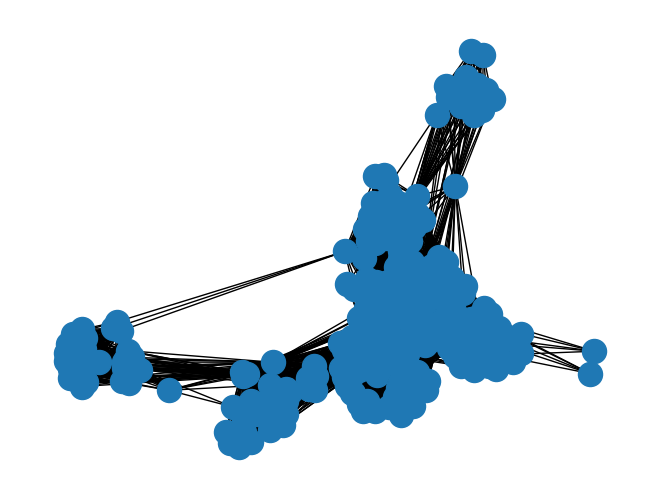

iteration
Sorted Cliques:
[('A1', 'B2', 'E4', 'C2', 'D4'), ('A1', 'C1', 'D1', 'B1', 'E1'), ('A1', 'B2', 'E3', 'D2', 'C3')]
Avg Jaccard Values:
{('A1', 'C1', 'D1', 'B1', 'E1'): 0.5736000000000001, ('A1', 'B2', 'E4', 'C2', 'D4'): 0.6842, ('A1', 'B2', 'E3', 'D2', 'C3'): 0.5502}
Selected Cliques:
[('A1', 'B2', 'E4', 'C2', 'D4')]
iteration
Sorted Cliques:
[('A1+B2+E4+C2+D4', 'C1', 'D1', 'B1', 'E1'), ('A1+B2+E4+C2+D4', 'E3', 'D2', 'C3'), ('A1+B2+E4+C2+D4', 'E2', 'D3')]
Avg Jaccard Values:
{('A1+B2+E4+C2+D4', 'E2', 'D3'): 0.2787777777777778, ('A1+B2+E4+C2+D4', 'C1', 'D1', 'B1', 'E1'): 0.5736000000000001, ('A1+B2+E4+C2+D4', 'E3', 'D2', 'C3'): 0.373375}
Selected Cliques:
[('A1+B2+E4+C2+D4', 'C1', 'D1', 'B1', 'E1')]
iteration
Sorted Cliques:
[('A1+B2+E4+C2+D4+C1+D1+B1+E1', 'E3', 'D2', 'C3'), ('A1+B2+E4+C2+D4+C1+D1+B1+E1', 'E2', 'D3')]
Avg Jaccard Values:
{('A1+B2+E4+C2+D4+C1+D1+B1+E1', 'E3', 'D2', 'C3'): 0.373375, ('A1+B2+E4+C2+D4+C1+D1+B1+E1', 'E2', 'D3'): 0.2787777777777778}
Selected Cliques:


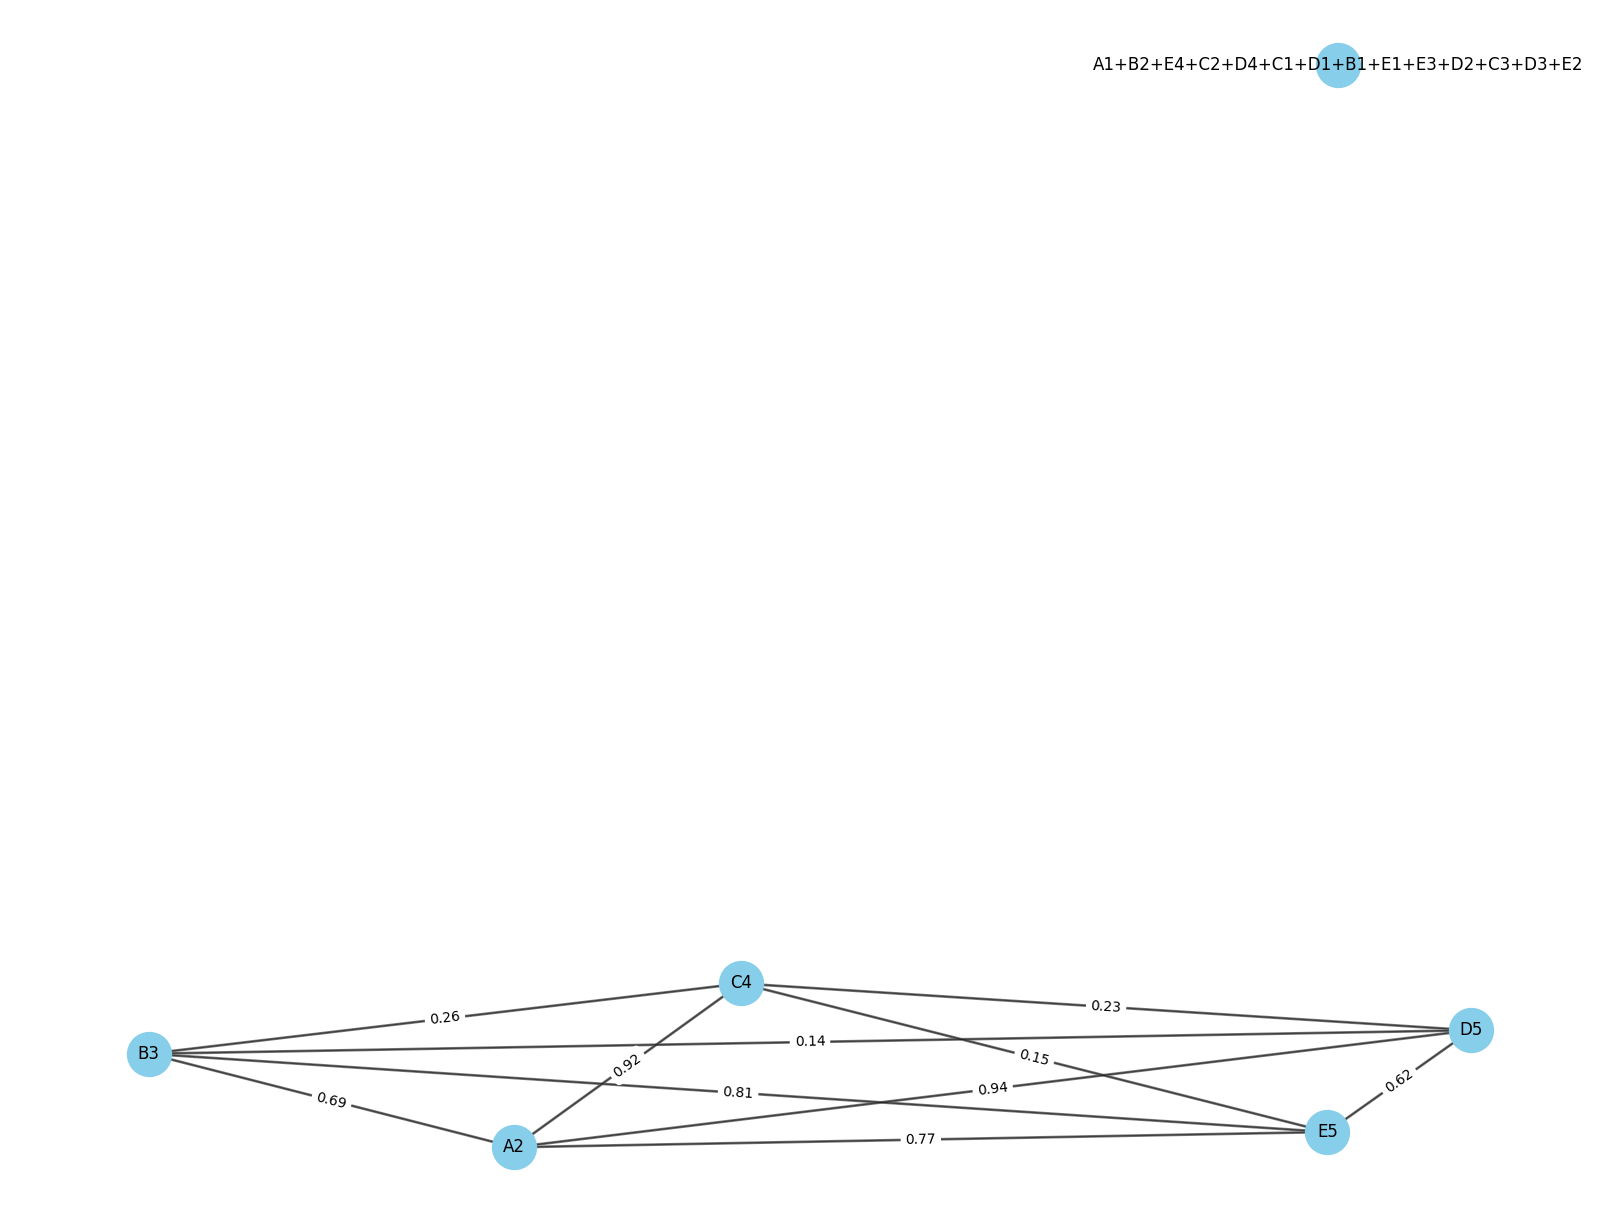

Number of nodes: 6
Number of edges: 10
Number of not complete graphs: 0
Number of complete graphs: 2
Component 2


In [5]:

class NxGraphAssistant():

    def __init__(self):
        pass
    def is_complete_graph(G):
        """
        Check if a graph is complete.
    
        Parameters:
        - G: NetworkX graph
    
        Returns:
        - True if the graph is complete, False otherwise
        """
        for node in G:
            if len(G[node]) != len(G) - 1:
                return False
        return True
    
    def is_same_connections(graph, node1, node2):
        """
        Checks if two nodes have the same connections in a graph.
        
        Parameters:
        - graph: NetworkX graph
        - node1: node identifier
        - node2: node identifier
        
        Returns:
        - bool: True if nodes have the same connections, False otherwise
        """
        try:
            return (graph.neighbors(node1)) == set(graph.neighbors(node2))
        except:
            return False
    
    def all_connection_similar_but_to_each_other(graph, node1, node2):
        """
        Checks if two nodes have the same connections in a graph but are not connected to each other.
    
        Parameters:
        - graph: NetworkX graph
        - node1: node identifier
        - node2: node identifier
    
        Returns:
        - bool: True if nodes have the same connections but are not connected to each other, False otherwise
        """
        try:
            set1 = set(graph.neighbors(node1))
            set2 = set(graph.neighbors(node2))
    
            if node2 in set1:
                set1.remove(node2)
            if node1 in set2:
                set2.remove(node1)
    
            return set1 == set2
        except Exception as e:
            print(f"An error occurred: {e}")
            return False
    
    def connected(graph,node1, node2):
        """
        Checks if two nodes are connected in a graph.
    
        Parameters:
        - graph: NetworkX graph
        - node1: node identifier
        - node2: node identifier
    
        Returns:
        - bool: True if nodes are connected, False otherwise
        """
        try:
            return nx.has_path(graph, node1, node2)
        except:
            return False
    @staticmethod    
    def all_most_connected_nodes(entire_graph : nx.Graph ,sub_graph) :
        try:
            most_connected_nodes = [max(sub_graph, key=lambda x: len(entire_graph[x]))]
            for node in sub_graph:
                if len(entire_graph[node]) == len(entire_graph[most_connected_nodes[0]]) and node != most_connected_nodes[0]:
                    most_connected_nodes.append(node)
                    
            return most_connected_nodes
        except:
            return []

    @staticmethod
    def analyze_cliques(G,treshold=0.9):
        # Find cliques with Jaccardian similarity higher than 0.9

        cliques = [clique for clique in nx.find_cliques(G) if all(G.has_edge(u, v) and G[u][v]['similarity'] > treshold for u, v in nx.utils.pairwise(clique))]


        # Calculate average Jaccardian value for each clique
        avg_jaccard_values = {}
        for clique in cliques:
            total_jaccard_value = sum(G[u][v]['similarity'] for u, v in nx.utils.pairwise(clique))
            avg_jaccard_value = total_jaccard_value / len(clique)
            avg_jaccard_values[tuple(clique)] = avg_jaccard_value

        # Sort cliques by average Jaccardian value in descending order
        # only keep the cliques that have a higher average Jaccardian value than the threshold
        
        sorted_cliques = sorted(avg_jaccard_values.keys(), key=lambda x: avg_jaccard_values[x], reverse=True) 


        print("Sorted Cliques:")
        print(sorted_cliques)
        print ("Avg Jaccard Values:")
        print(avg_jaccard_values)
        # Keep track of assigned nodes
        assigned_nodes = set()

        # remove all cliques that have nodes that are already assigned
        selected_cliques = []
        for clique in sorted_cliques:
            if not assigned_nodes.intersection(clique):
                selected_cliques.append(clique)
                assigned_nodes.update(clique)



        print("Selected Cliques:")
        print(selected_cliques)

        # create copy of graph G
        new_graph = G.copy()
        # iterate all cliques
        for clique in selected_cliques:
            # create a new node for the clique
            name = ""
            for node in clique:
                if name != "":
                    name += "+"
                name += str(node)
            new_node = name
            # add the new node to the new graph
            new_graph.add_node(new_node)
            # remove the old nodes from the new graph
            new_graph.remove_nodes_from(clique)
            # add edges between the new clique and the old nodes each clique member was connected to
            for node in clique:
                for neighbor in G.neighbors(node):
                    if neighbor not in clique and neighbor in new_graph.nodes():
                        #TODO also add weight (average)
                        new_graph.add_edge(new_node, neighbor)
                        #print("Added edge between", new_node, "and", neighbor)
        return new_graph




    def analyze_cliques_new(G, threshold=0.5, sim='similarity'):
        graph = G.copy()
        while True:
            print("iteration")
            cliques = [clique for clique in nx.find_cliques(graph) if all(graph.has_edge(u, v) and graph[u][v][sim] > threshold for u, v in nx.utils.pairwise(clique))]
            if not cliques:
                print("break")
                break

            # Calculate average Jaccardian value for each clique
            avg_jaccard_values = {}
            for clique in cliques:
                total_jaccard_value = sum(graph[u][v]['similarity'] for u, v in nx.utils.pairwise(clique))
                avg_jaccard_value = total_jaccard_value / len(clique)
                avg_jaccard_values[tuple(clique)] = avg_jaccard_value

            # Sort cliques by average Jaccardian value in descending order
            sorted_cliques = sorted(avg_jaccard_values.keys(), key=lambda x: avg_jaccard_values[x], reverse=True)
            #remove all cliques with to low Jaccardian value
            sorted_cliques = [clique for clique in sorted_cliques if avg_jaccard_values[clique] > threshold]
            if not sorted_cliques:
                print("break")
                break
            print("Sorted Cliques:")
            print(sorted_cliques)
            print("Avg Jaccard Values:")
            print(avg_jaccard_values)

            # Keep track of assigned nodes
            assigned_nodes = set()

            # Remove all cliques that have nodes that are already assigned
            selected_cliques = []
            for clique in sorted_cliques:
                if not assigned_nodes.intersection(clique):
                    selected_cliques.append(clique)
                    assigned_nodes.update(clique)
            print("Selected Cliques:")
            print(selected_cliques)

            # Create a copy of the graph
            new_graph = graph.copy()

            # Iterate over the selected cliques
            for clique in selected_cliques:
                # Create a new node for the clique
                name = "+".join(str(node) for node in clique)
                new_node = name

                # Add the new node to the new graph
                new_graph.add_node(new_node)

                # Remove the old nodes from the new graph
                new_graph.remove_nodes_from(clique)

                # Add edges between the new clique and the old nodes each clique member was connected to
                for node in clique:
                    for neighbor in graph.neighbors(node):
                        if neighbor not in clique and neighbor in new_graph.nodes():
                            # calculate the average similarity between the new node and the neighbor
                            summe = 0
                            count = 0
                            for n in clique:
                                # check if node is connected to the neighbor
                                if graph.has_edge(n, neighbor):
                                    summe += graph[n][neighbor][sim]
                                    count += 1
                            if count > 0:

                                new_graph.add_edge(new_node, neighbor, **{sim: summe / count})
                            else:

                                new_graph.add_edge(new_node, neighbor, **{sim: 0})

            graph = new_graph
            # check how many nodes in the graph
            if len(graph) == 1:
                break
        return graph


    @staticmethod
    def plot_networkX_graph(G):
        import networkx as nx
        import matplotlib.pyplot as plt

        # Adjust the layout of the graph for better readability
        pos = nx.spring_layout(G, k=0.15)  # You can adjust the value of 'k' for desired spacing

        nx.draw(G, pos, with_labels=True, font_weight='bold')
        plt.show()
    @staticmethod
    def remove_edges(graph, similarity='similarity', threshold=0.5):
        G_copy = nx.Graph(graph)
        # --- test if we need to remove edges
        e2js = {frozenset({e1, e2}): G_copy[e1][e2][similarity] for e1, e2 in G_copy.edges}
        # --- remove edges with unmatching cluster solutions
        re = [(e1, e2) for (e1, e2), sim in e2js.items() if sim < threshold]
        G_copy.remove_edges_from(re)
        return G_copy

g = cc.G
# Plot graph
nx.draw(g)
plt.show()

g3 = g

g3 = GraphCreator().create_advanced_graph()
# Assuming NxGraphAssistant is some custom helper class or function

# Remove edges based on threshold
#g3 = NxGraphAssistant.remove_edges(g, threshold=0.95)

# Analyze cliques with a threshold
g3 = NxGraphAssistant.analyze_cliques_new(g3, 0.2)

# Get layout
pos = nx.spring_layout(g3)

# Extract edge weights
edge_weights = nx.get_edge_attributes(g3, 'similarity')
edge_weights = {key: np.round(val, 2) for key, val in edge_weights.items()}

# Plot graph with edges
plt.figure(figsize=(16, 12))  # Adjust figure size as needed
nx.draw(g3, pos, with_labels=True, node_size=1000, node_color='skyblue', edge_color='gray', width=2)  # Customize node size, color, edge color, and width as needed
nx.draw_networkx_edges(g3, pos, alpha=0.5)  # Adjust alpha for edge transparency
nx.draw_networkx_edge_labels(g3, pos, edge_labels=edge_weights)

plt.show()

# Print the number of edges and nodes in the graph
print("Number of nodes:", g3.number_of_nodes())
print("Number of edges:", g3.number_of_edges())

# count how many not complete graphs are in g3
not_complete_graphs = 0
complet = 0
components = 0
for sub_graph in nx.connected_components(g3):
    components += 1
    if not NxGraphAssistant.is_complete_graph(g3.subgraph(sub_graph)):
        not_complete_graphs += 1
    else:
        complet += 1
        
print("Number of not complete graphs:", not_complete_graphs)
print("Number of complete graphs:", complet)
print("Component", components)


### Plot the graph

In [6]:
g = cc.G
#g =cc.remove_edges_density(rho)  # simplified graph

pos = nx.spring_layout(g)
edge_weights = nx.get_edge_attributes(g, 'similarity') # Extract edge weights
edge_weights = {key: np.round(val,2) for key, val in edge_weights.items()}

# Plot graph
nx.draw(g, pos, with_labels=True)
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_weights)

plt.show()

KeyboardInterrupt: 

### Plot  cliques

In [ ]:
# Find all cliques in the graph
all_cliques = list(nx.find_cliques(g))
    # Create a color map for nodes based on communities
color_map = {}
for i, clique in enumerate(all_cliques):
    for node in clique:
        color_map[node] = i

# Plot the graph with cliques highlighted
pos = nx.spring_layout(g)  # Compute layout

# Draw nodes and edges
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='gray')

# Highlight cliques
for clique in all_cliques:
    nx.draw_networkx_nodes(g, pos, node_color=[color_map[node] for node in g.nodes()], cmap=plt.cm.tab20, node_size=300, alpha=0.5)

# Add labels for cliques
clique_labels = {tuple(clique): f"Clique {i+1}" for i, clique in enumerate(all_cliques)}
# print(clique_labels)
plt.title("Graph with Cliques Highlighted")
plt.show()

### Final solution (standard consensus method)

In [ ]:
labels_cc = cc.fit(density=rho, min_cluster_size=15)
# brings cluster labels into the format 0 - (N_clusters-1)
labels_cc_clean = LabelEncoder().fit_transform(labels_cc) - 1
print(np.unique(labels_cc_clean))

NameError: name 'cc' is not defined